### This data depend upon amount of money spend on advertisement through tv,radio and newspaper the goal is to predict how the reach of each channel effect the sale and is there a way to optimize the sale


In [1]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
import math    

### Importing csv file data

In [2]:
data = pd.read_csv("D:\coding\python projects\Experiment_1\Advertising.csv")
data
    

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


### first five rows of data

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### tell shape of data

In [4]:
data.shape

(200, 5)

### give information of data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### describe data

In [6]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

### identifying outliers

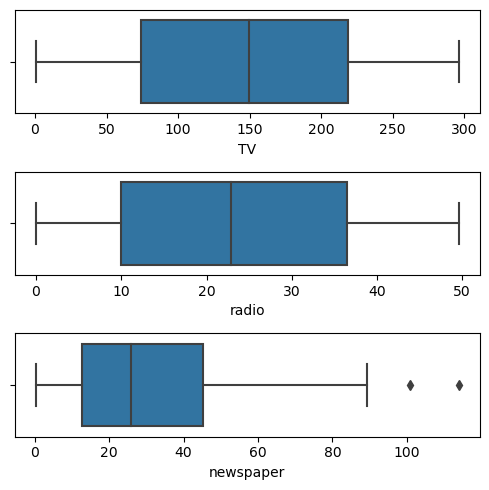

In [30]:
import warnings

with warnings.catch_warnings(record=True):
    

    fig,axs = plt.subplots(3, figsize=(5,5))
    plt1 = sns.boxplot(data['TV'],ax=axs[0])
    plt2 = sns.boxplot(data['newspaper'],ax=axs[2])
    plt3 = sns.boxplot(data['radio'],ax=axs[1])
    plt.tight_layout()
    plt.savefig('outlier_fig')

### scatter plot

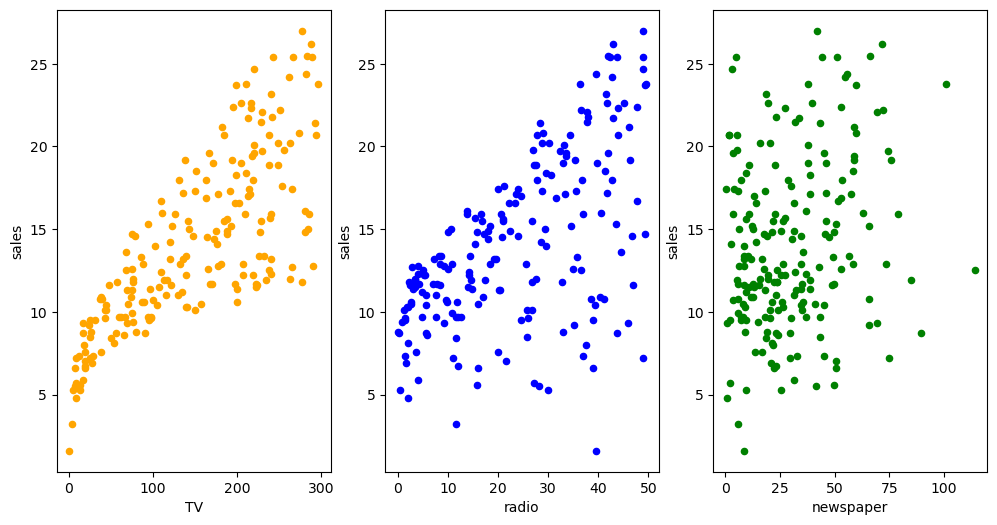

In [31]:
fig,axs=plt.subplots(1,3)
data.plot(kind="scatter", x="TV", y="sales", color="orange", ax=axs[0],figsize=(12,6))
data.plot(kind="scatter", x="radio", y="sales", color="blue", ax=axs[1],figsize=(12,6))
data.plot(kind="scatter", x="newspaper", y="sales", color="green", ax=axs[2],figsize=(12,6))
plt.show()

## linear regression model for tv

In [32]:
X= data[['TV']]
y = data.sales
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)

LinearRegression()

### Finding intercept and coefficent

In [33]:
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


### sales = 0.047X + 7.03

In [34]:
%%capture --no-display
lm.predict([[50]])

array([9.40942557])

### R2_score

In [35]:
from sklearn.metrics import r2_score
z= lm.predict(X)
r2_score(y_true=y,y_pred=z)

0.611875050850071

### mean absolute error

In [36]:
from sklearn.metrics import mean_absolute_error
m= lm.predict(X)
mean_absolute_error(y_true=y,y_pred=m)

2.549806038927486

### mean square absolute error

In [37]:
from sklearn.metrics import mean_squared_error
ms= lm.predict(X)
mean_squared_error(y_true=y,y_pred=ms)

10.512652915656757

### root mean square

In [38]:
import math
from sklearn.metrics import mean_squared_error
ms= lm.predict(X)
mse = mean_squared_error(y_true=y,y_pred=ms)
rmse = math.sqrt(mse)
rmse

3.2423221486546887

## linear regression model for newspaper

In [39]:
X1= data[['newspaper']]
y = data.sales
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X1,y)

LinearRegression()

### finding intercept and Coefficient


In [40]:
print(lm.intercept_)
print(lm.coef_)


12.351407069278162
[0.0546931]


### sales = 0.054X1 + 12.35 

In [41]:
%%capture --no-display
lm.predict([[50]])

array([15.08606199])

### r2 score

In [42]:
from sklearn.metrics import r2_score
z= lm.predict(X1)
r2_score(y_true=y,y_pred=z)

0.05212044544430516

### mean absolute error

In [43]:
from sklearn.metrics import mean_absolute_error
m= lm.predict(X1)
mean_absolute_error(y_true=y,y_pred=m)

4.146559743838488

### mean square absolute error

In [44]:
from sklearn.metrics import mean_squared_error
ms= lm.predict(X1)
mean_squared_error(y_true=y,y_pred=ms)

25.674022720559698

### root mean square

In [45]:
import math
from sklearn.metrics import mean_squared_error
ms= lm.predict(X1)
mse = mean_squared_error(y_true=y,y_pred=ms)
rmse = math.sqrt(mse)
rmse

5.066953988399707

## Linear regression model for radio

In [46]:
X2= data[['radio']]
y = data.sales
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X2,y)

LinearRegression()

### finding intercept and Coefficient


In [47]:
print(lm.intercept_)
print(lm.coef_)


9.311638095158283
[0.20249578]


### sales = 0.202X2 + 9.3116

In [48]:
%%capture --no-display
lm.predict([[50]])

array([19.43642726])

### r2 score

In [49]:
from sklearn.metrics import r2_score
z= lm.predict(X2)
r2_score(y_true=y,y_pred=z)

0.33203245544529525

### mean absolute error

In [50]:
from sklearn.metrics import mean_absolute_error
m= lm.predict(X2)
mean_absolute_error(y_true=y,y_pred=m)

3.3202187976420663

### mean square absolute error

In [51]:
from sklearn.metrics import mean_squared_error
ms= lm.predict(X2)
mean_squared_error(y_true=y,y_pred=ms)

18.09239774512544

### root mean square error

In [52]:
import math
from sklearn.metrics import mean_squared_error
ms= lm.predict(X2)
mse = mean_squared_error(y_true=y,y_pred=ms)
rmse = math.sqrt(mse)
rmse

4.2535159274564185

## multiple linear regression

In [53]:
Xm= data[['TV','newspaper','radio']]
y = data.sales
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(Xm,y)

LinearRegression()

### finding intercept and coeffcient

In [54]:
print("Intercept: ",lm.intercept_)
print("Coef_TV:",lm.coef_[0])
print("Coef_newspaper:",lm.coef_[1])
print("Coef_radio:",lm.coef_[2])

Intercept:  2.9388893694594067
Coef_TV: 0.045764645455397615
Coef_newspaper: -0.001037493042476259
Coef_radio: 0.18853001691820445


### sales = 0.045X + -0.0010X1 + 0.188X2 + 2.938

In [55]:
%%capture --no-display
lm.predict([[50,50,50]])

array([14.60174784])

### r2_score

In [56]:
from sklearn.metrics import r2_score
z= lm.predict(Xm)
r2_score(y_true=y,y_pred=z)

0.8972106381789522

### mean absolute error

In [57]:
from sklearn.metrics import mean_absolute_error
m= lm.predict(Xm)
mean_absolute_error(y_true=y,y_pred=m)

1.2520112296870687

### mean square absolute error

In [58]:
from sklearn.metrics import mean_squared_error
ms= lm.predict(Xm)
mean_squared_error(y_true=y,y_pred=ms)

2.784126314510936

### root mean square error

In [59]:
import math
from sklearn.metrics import mean_squared_error
ms= lm.predict(Xm)
mse = mean_squared_error(y_true=y,y_pred=ms)
rmse = math.sqrt(mse)
rmse

1.6685701407225697

## linear regression model for tv and radio only

In [60]:
Xtr= data[['TV','radio']]
y = data.sales
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(Xtr,y)

LinearRegression()

### finding intercept and coeffcient

In [61]:
print("Intercept: ",lm.intercept_)
print("Coef_TV:",lm.coef_[0])
print("Coef_radio:",lm.coef_[1])

Intercept:  2.921099912405138
Coef_TV: 0.04575481510107615
Coef_radio: 0.18799422662030915


### sales = 0.045X + 0.187X1 + 2.921

### r2_score for tv and radio only

In [62]:
from sklearn.metrics import r2_score
z= lm.predict(Xtr)
r2_score(y_true=y,y_pred=z)

0.8971942610828956

### mean absolute square error

In [63]:
from sklearn.metrics import mean_absolute_error
m= lm.predict(Xtr)
mean_absolute_error(y_true=y,y_pred=m)

1.2537471644234006

### mean square absolute error

In [64]:
from sklearn.metrics import mean_squared_error
ms= lm.predict(Xtr)
mean_squared_error(y_true=y,y_pred=ms)

2.7845699003380924

### root mean square

In [65]:
import math
from sklearn.metrics import mean_squared_error
ms= lm.predict(Xtr)
mse = mean_squared_error(y_true=y,y_pred=ms)
rmse = math.sqrt(mse)
rmse

1.6687030593661931

## tv linear model line plot

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()

,TV
169,284.3
97,184.9
31,112.9
12,23.8
35,290.7


In [67]:
y_train.head()

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
Name: sales, dtype: float64

In [68]:
X_test.head()

,TV
95,163.3
15,195.4
30,292.9
158,11.7
128,220.3


In [69]:
lm.fit(X_train,y_train)

LinearRegression()

In [70]:
y_pred = lm.predict(X_test)
y_pred

array([14.81785392, 16.30754437, 20.83230507,  7.78243112, 17.46309864,
       10.72468577, 17.30067133,  9.55984994, 17.56055502, 15.36546598,
        8.7013056 ,  9.84757831, 18.12208943,  7.49006196, 13.71334823,
       15.13806775,  7.57823679, 16.40964153, 10.73396733, 18.25667206,
       17.89005042, 10.38590882,  9.00295631, 18.88317738, 10.44159818,
        9.72227724, 17.14752559, 13.70406667, 11.28622018,  7.62928537,
       16.5117387 , 10.45087974, 16.46997167,  8.02375169, 20.26612989,
       18.2937983 ,  9.48095667, 19.94127527, 12.67845424,  8.51567439,
       12.62276488, 15.45364081,  9.2396361 , 10.1306659 , 17.63480751,
        9.01223787, 10.51585066, 14.07532908, 12.09371593, 10.78037513,
       10.86854996, 15.05453371,  7.64320771,  7.60144069, 10.78501591,
       13.24462943, 10.64579251, 20.68380011,  8.14905275, 16.40964153])

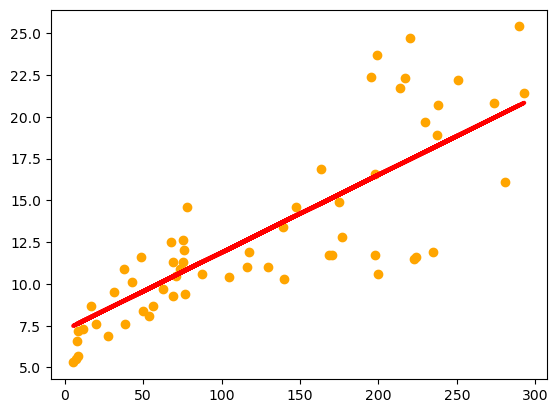

In [71]:
plt.scatter(X_test,y_test,color="orange")
plt.plot(X_test,y_pred,color="red",linewidth=3)

### Newspaper linear regression plot

In [72]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.3, random_state=42)
X1_train.head()


,newspaper
169,6.4
97,22.0
31,38.6
12,65.9
35,8.5


In [73]:
lm.fit(X1_train,y1_train)

LinearRegression()

In [74]:
%%capture --no-display
y1_pred = lm.predict(X1_test)
y1_pred

array([15.86524548, 15.86524548, 15.27418406, 15.39605239, 12.83681738,
       15.85305865, 14.29923739, 13.76301672, 13.44006563, 14.56125431,
       12.77588321, 14.45157281, 17.8090454 , 13.21460922, 14.26267689,
       14.78671072, 15.16450256, 13.50709322, 14.62218847, 13.31210388,
       17.16314324, 19.58832308, 13.36694463, 17.04736832, 12.6966688 ,
       13.94581922, 14.70140289, 13.26335655, 14.22002297, 12.7697898 ,
       13.93363239, 13.7569233 , 16.29787806, 18.08934257, 14.89639222,
       12.96477913, 13.15976847, 16.27959781, 12.97087255, 13.9031653 ,
       14.0494073 , 13.03180671, 14.78061731, 13.7569233 , 13.59240105,
       13.48271955, 15.12794206, 13.80567064, 14.73796339, 13.61677472,
       14.74405681, 13.42178538, 17.21189057, 15.72509689, 13.54365372,
       14.54906747, 13.4278788 , 15.76165739, 13.67770888, 13.00133963])

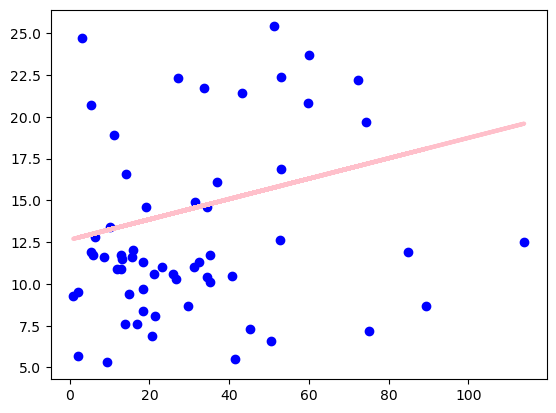

In [75]:
plt.scatter(X1_test,y1_test,color="blue")
plt.plot(X1_test,y1_pred,color="pink",linewidth=3)

## linear regression plot for radio

In [76]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=42)
X2_train.head()

,radio
169,10.6
97,21.0
31,17.4
12,35.1
35,4.1


In [77]:
lm.fit(X2_train,y2_train)

LinearRegression()

In [78]:
%%capture --no-display
y2_pred = lm.predict(X2_test)
y2_pred

array([16.26772205, 19.79791711, 15.5441417 , 17.42983596, 20.08296392,
       17.01322909, 18.96470337, 11.88238658, 10.08439904, 14.27239441,
       14.73285464, 10.58871262, 10.08439904, 15.89496854,  9.79935223,
       11.04917284, 15.50028835, 14.44780783, 13.79000751, 15.36872828,
       16.4212088 , 17.36405592, 18.17534299, 17.34212925, 11.378073  ,
        9.77742555, 18.76736327, 12.51826022, 11.92623994, 15.30294825,
        9.90898562, 13.83386087, 20.17067063, 18.92085002, 12.38670016,
       16.85974234, 19.64443037, 15.67570177, 12.56211358,  9.68971884,
       11.02724616, 11.378073  , 15.19331486, 12.10165335,  9.86513226,
       10.15017907, 12.84716039, 14.5793679 , 10.58871262, 15.36872828,
       19.60057701, 10.8956861 , 20.06103724, 17.8683695 ,  9.51430543,
       10.58871262, 13.06642716, 18.61387653, 13.74615416, 10.10632571])

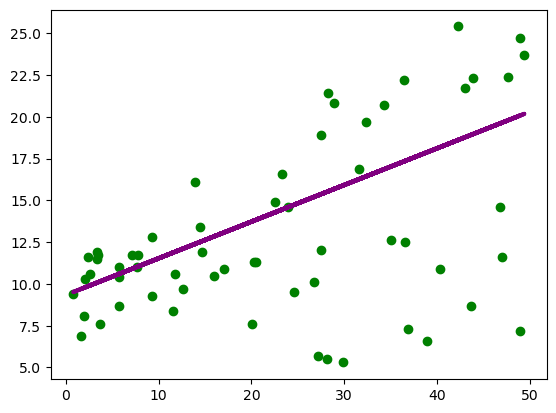

In [79]:
plt.scatter(X2_test,y2_test,color="green")
plt.plot(X2_test,y2_pred,color="purple",linewidth=3)

## multiple linear regression plot

In [80]:
from sklearn.model_selection import train_test_split
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, y, test_size=0.3, random_state=42)
Xm_train.head()

,TV,newspaper,radio
169,284.3,6.4,10.6
97,184.9,22.0,21.0
31,112.9,38.6,17.4
12,23.8,65.9,35.1
35,290.7,8.5,4.1


In [81]:
Xm_test.head()

,TV,newspaper,radio
95,163.3,52.9,31.6
15,195.4,52.9,47.7
30,292.9,43.2,28.3
158,11.7,45.2,36.9
128,220.3,3.2,49.0


In [82]:
ym_train.head()

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
Name: sales, dtype: float64

In [83]:
ym_test.head()

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: sales, dtype: float64

In [84]:
lm.fit(Xm_train,ym_train)

LinearRegression()

In [85]:
ym_pred = lm.predict(Xm_test)
ym_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

Text(0.5, 0, 'newspaper')

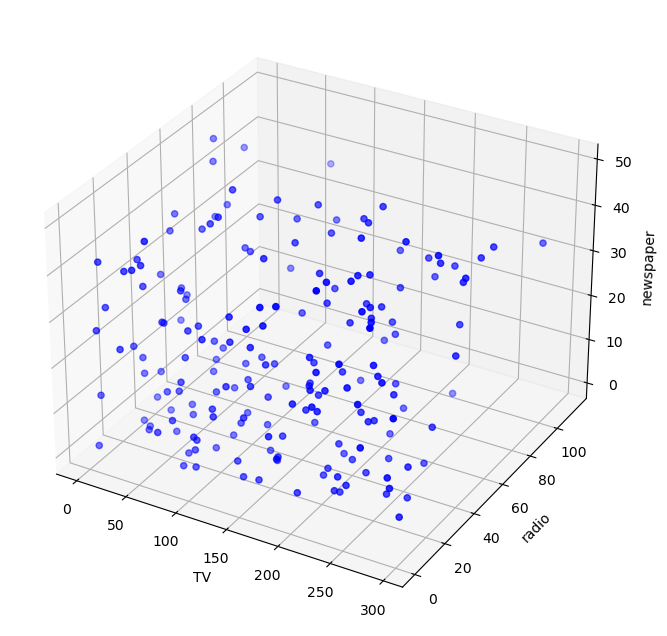

In [88]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xm['TV'],Xm['newspaper'],Xm['radio'],  c='blue', marker='o')

ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('newspaper')